In [4]:
import pandas as pd 
import yfinance as yf
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 20, 10 

plt.style.use('ggplot')

%matplotlib inline  
# %pylab inline

Matplotlib is building the font cache; this may take a moment.


In [5]:
spy_data = yf.download('^GSPC', as_panel=False)

[*********************100%***********************]  1 of 1 completed


In [6]:
spy_data.head()

Open   High    Low  Close  Adj Close   Volume
Date                                                      
1950-01-03  16.66  16.66  16.66  16.66      16.66  1260000
1950-01-04  16.85  16.85  16.85  16.85      16.85  1890000
1950-01-05  16.93  16.93  16.93  16.93      16.93  2550000
1950-01-06  16.98  16.98  16.98  16.98      16.98  2010000
1950-01-09  17.08  17.08  17.08  17.08      17.08  2520000

In [7]:
spy_data.describe()

Open          High           Low         Close     Adj Close  \
count  18223.000000  18223.000000  18223.000000  18223.000000  18223.000000   
mean     684.538917    715.119014    706.409453    711.047129    711.047129   
std      948.076368    934.914785    924.257378    929.942388    929.942388   
min        0.000000     16.660000     16.660000     16.660000     16.660000   
25%        0.000000     88.209999     86.844997     87.559998     87.559998   
50%      232.300003    234.619995    230.570007    232.539993    232.539993   
75%     1170.580017   1178.650024   1162.054993   1170.960022   1170.960022   
max     4804.509766   4818.620117   4780.040039   4796.560059   4796.560059   

             Volume  
count  1.822300e+04  
mean   1.070245e+09  
std    1.672499e+09  
min    6.800000e+05  
25%    9.870000e+06  
50%    1.247000e+08  
75%    1.528750e+09  
max    1.145623e+10

In [8]:
def ajustado(df):
        dt=pd.DataFrame()
        lista=['Open','High','Low']
        for f in lista:
            dt[f]=(df[f]*df['Adj Close'])/df['Close']
        dt['Close']=df['Adj Close']
        dt['Volume']=df['Volume']
        return dt

In [ ]:
spy = ajustado(spy_data)['2010':]

spy.head()

In [ ]:
spy['Mes'] = spy.index.month
spy['Mes'] = spy.index.month
spy ['Dia_sem'] = spy.index.dayofweek
spy ['Retorno'] = spy.Close.pct_change()
spy ['Dia'] = spy.index.day

spy.tail()

In [45]:
mes_dia = spy.pivot_table(values='Retorno', columns='Mes', index='Dia')
spy_mes = spy.groupby('Mes').Retorno.mean()

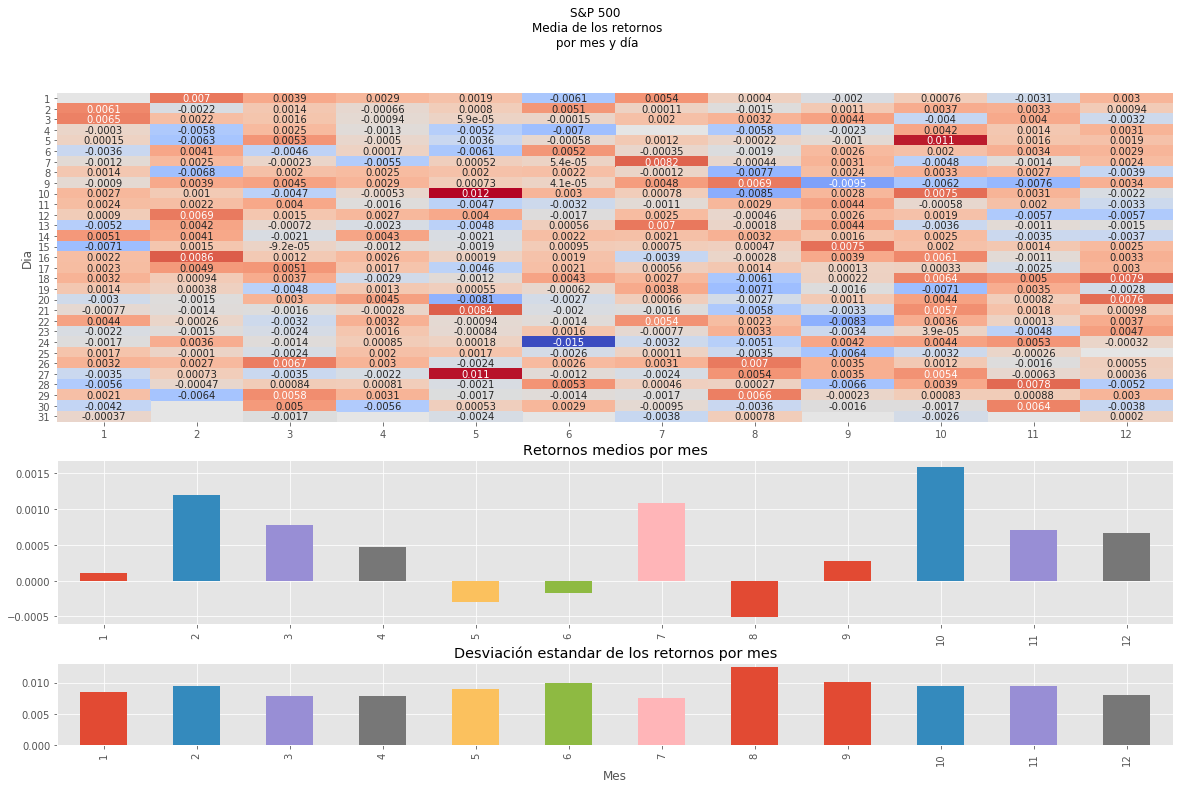

In [90]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=False, figsize=(20, 12), gridspec_kw = {'height_ratios':[4, 2, 1]})
fig.suptitle('S&P 500 \nMedia de los retornos\n por mes y día ')      
sns.heatmap(mes_dia, annot=True, cmap=plt.cm.coolwarm, cbar = False, ax=ax1)
ax1.axes.xaxis.set_label_text('')
ax2.set_title('Retornos medios por mes')
spy_mes.plot.bar(ax=ax2)
ax2.axes.xaxis.set_label_text('')
ax3.set_title('Desviación estandar de los retornos por mes')
spy.groupby('Mes').Retorno.std().plot.bar(ax=ax3)
plt.show()